<a href="https://colab.research.google.com/github/RohanAG2806/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **1)Importing Libraries**

In [2]:
#Importing necessary libraries to perform the analysis
import numpy as np
import pandas as pd

In [3]:
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2)Importing Datasets**

In [5]:
path = "/content/drive/MyDrive/Capstone-2-Bike sharing demand prediction/SeoulBikeData.csv"

In [6]:
data = pd.read_csv(path,encoding='unicode escape')

In [7]:
# First 5 rows of data
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# Last 5 rows of data
data.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# Shape of data
data.shape

(8760, 14)

In [10]:
# Statistical data
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
#  correlation of columns in the data
data.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


## **3)Data Cleaning**

In [12]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

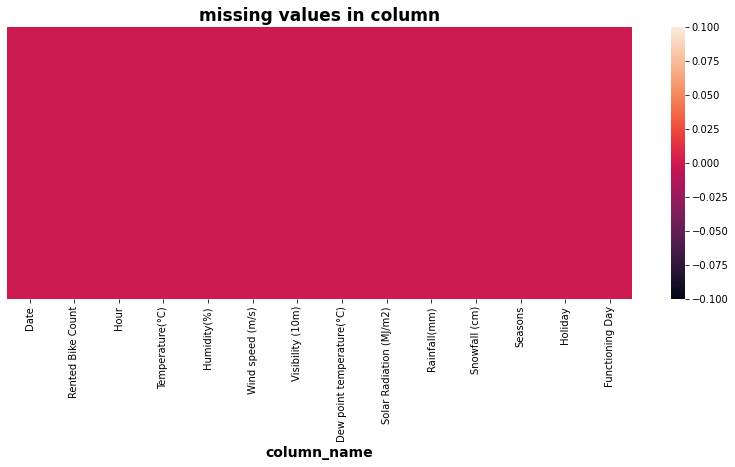

In [13]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [14]:
# Transpose index and columns
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [15]:
numerical_features = data.describe().columns
dist_column = list(numerical_features)
dist_column

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

## **Exploratory Data Analysis and Preprocessing (EDA)**

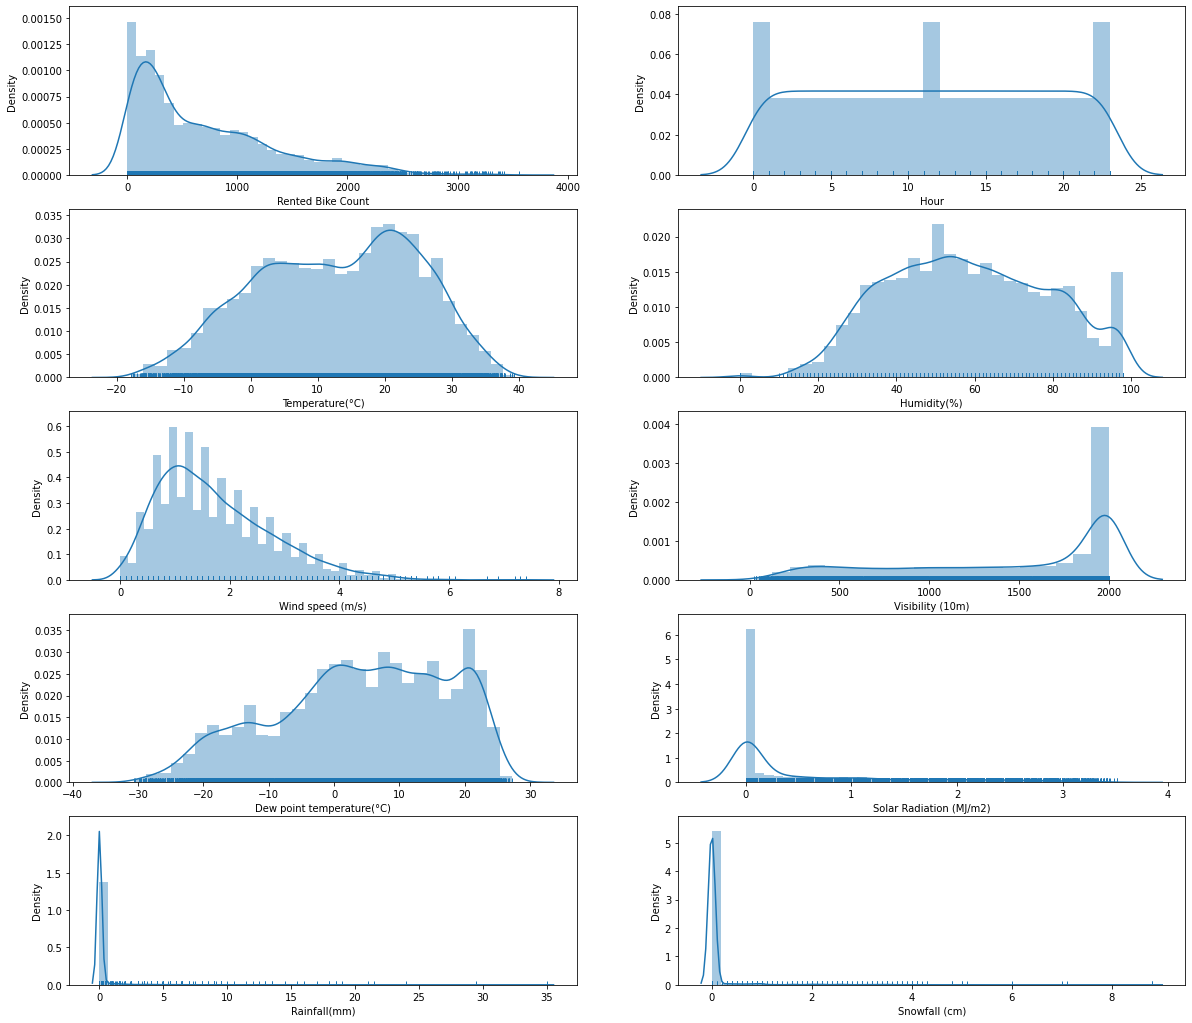

In [16]:
#Distributions of various features in the dataset
plt.figure(figsize=(20,18))
for i in range(len(dist_column)):
  plt.subplot(5,2,i+1)
  sns.distplot(data[dist_column[i]],hist=True,rug=True)

## **Plotting Histogram**

In [17]:
# Numerical features

numeric_features= data.select_dtypes(exclude='object')

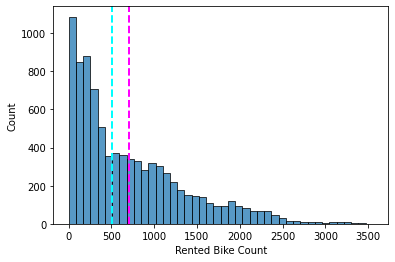

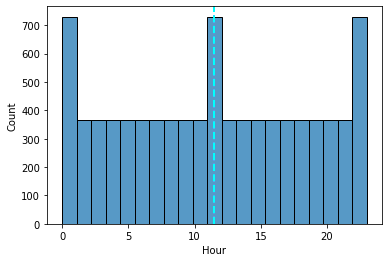

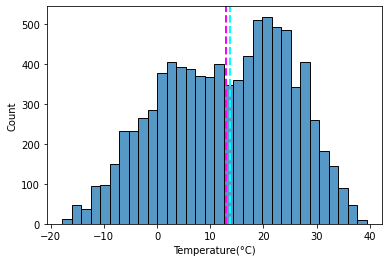

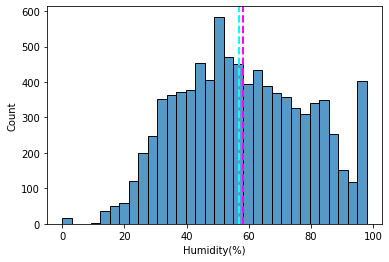

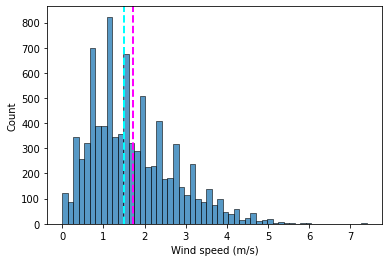

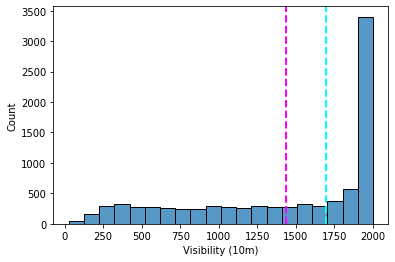

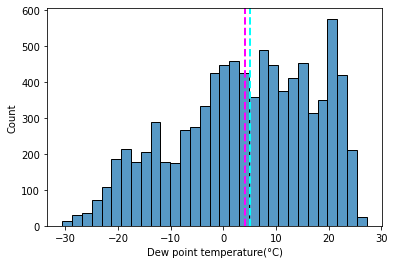

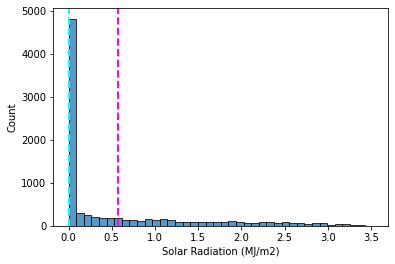

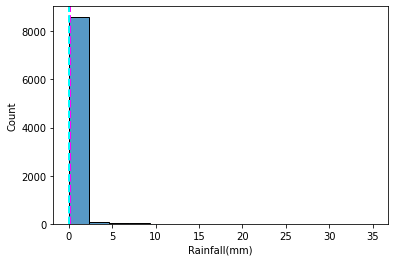

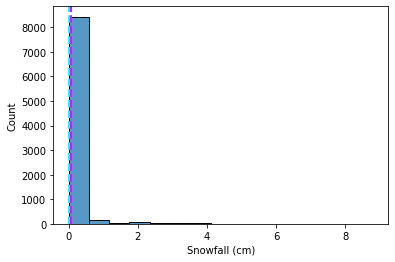

In [18]:
for col in numeric_features[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

In [19]:
# Extraction of month and year
frame = pd.to_datetime(data['Date'],dayfirst=True)
data['month'] = frame.dt.month
data['year'] = frame.dt.year

### **Number of bikes rented at different months**

Text(0.5, 1.0, 'Number of bikes rented at different months')

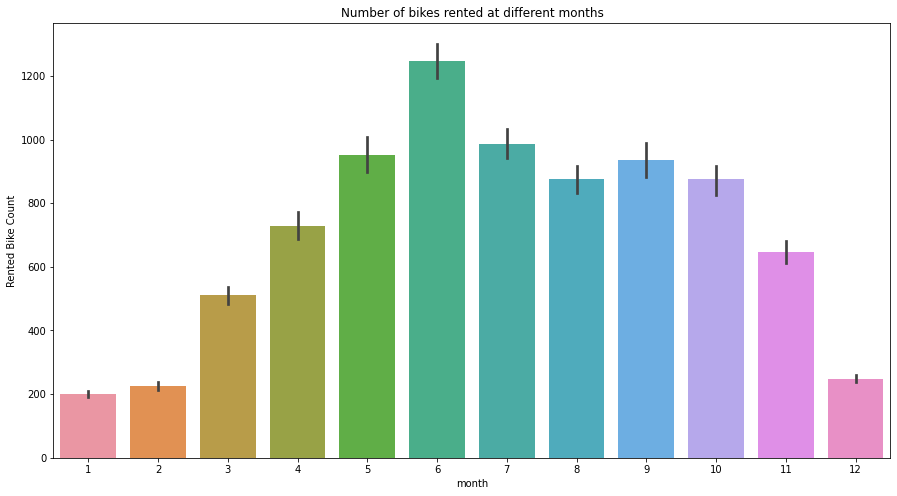

In [20]:
#Plotting number of Bikes rented at different months
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count', data = data)
plt.title('Number of bikes rented at different months')

## **Number of Bikes rented across different seasons**

<Figure size 1080x720 with 0 Axes>

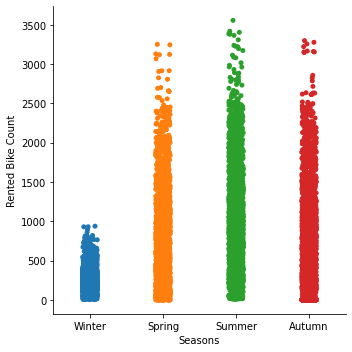

In [21]:
#Number of bikes rented across different seasons
plt.figure(figsize=(15,10))
sns.catplot(x='Seasons',y='Rented Bike Count', data=data)

## **Ploting Regression plot of each columns of dataset v/s rented bike count columns**

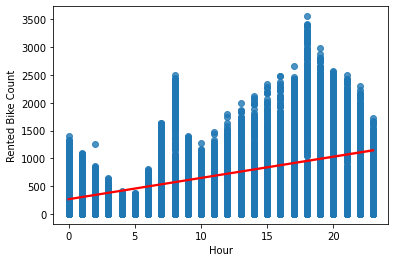

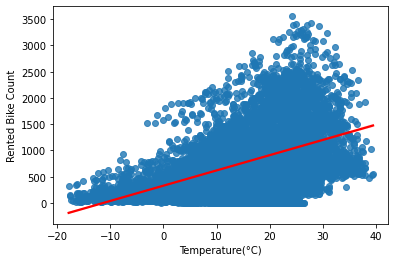

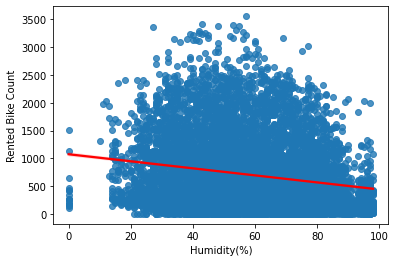

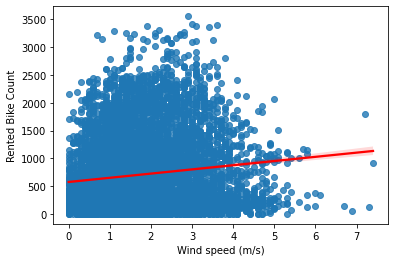

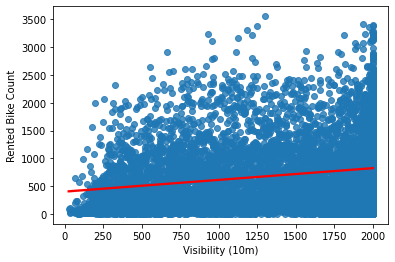

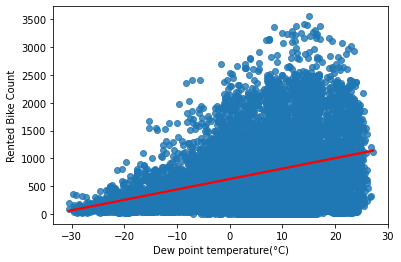

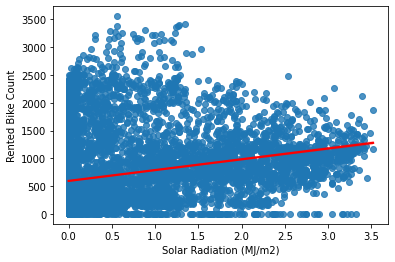

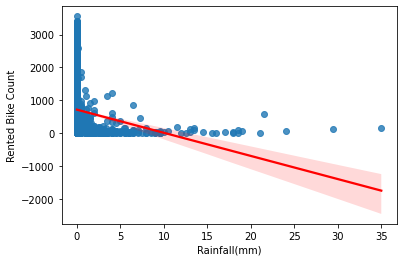

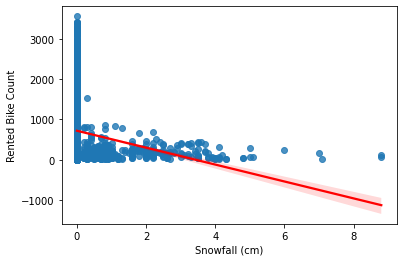

In [22]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=data[col],y=data["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [23]:
# Extraction of month and year
frame = pd.to_datetime(data['Date'],dayfirst=True)
data['month'] = frame.dt.month
data['year'] = frame.dt.year

## **Number of bikes rented at different months**

Text(0.5, 1.0, 'Number of bikes rented at different months')

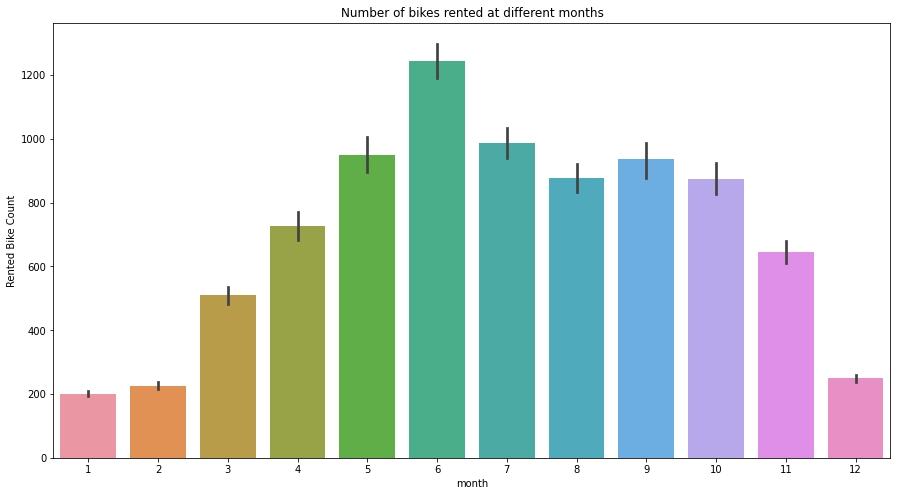

In [24]:
#Plotting number of Bikes rented at different months
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count', data = data)
plt.title('Number of bikes rented at different months')

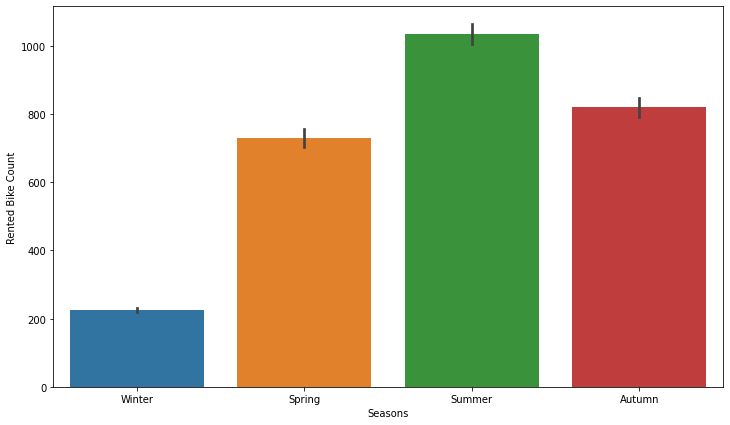

In [25]:
#Number of bikes rented across different seasons
plt.figure(figsize=(12,7))
sns.barplot(x='Seasons',y='Rented Bike Count', data=data)

## **Plotting in Another way**

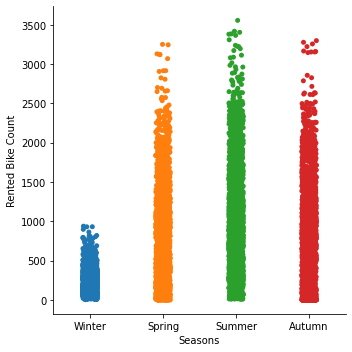

In [26]:
sns.catplot(x='Seasons',y='Rented Bike Count',data=data)

## **Temperature impact on bike renting**

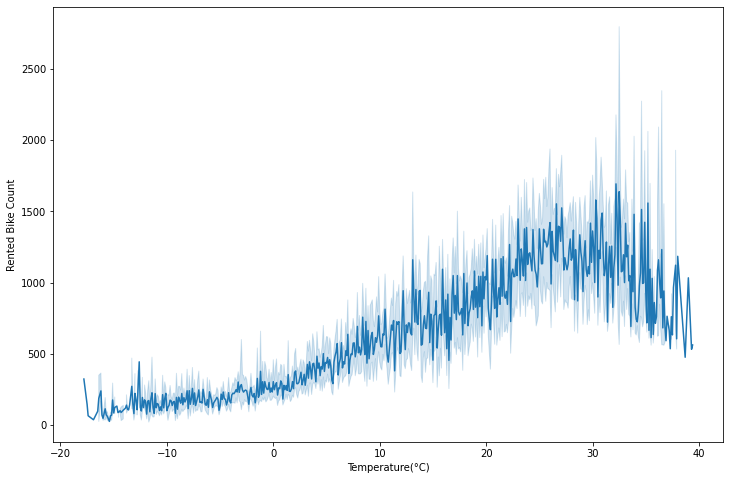

In [27]:
#Looking wether temparature impacts rent count
plt.figure(figsize=(12,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count', data=data)

## **Bike counts on funtional and non funtional day**

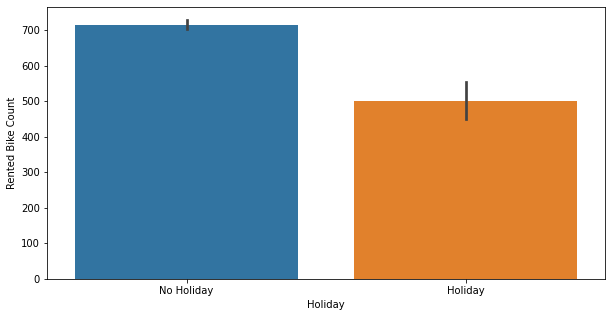

In [28]:
#Bike rent counts on Functioning day and non funtioninal day
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count', data=data)

## **Dew point temperature impact on bike renting**

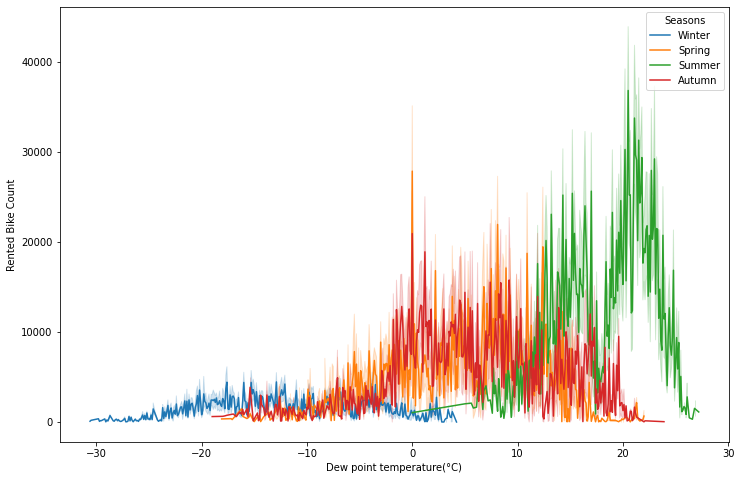

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count', data=data, estimator = 'sum',hue='Seasons',)

## **Checking Outliers**

## **Relation of dependent variable with categorical feat**

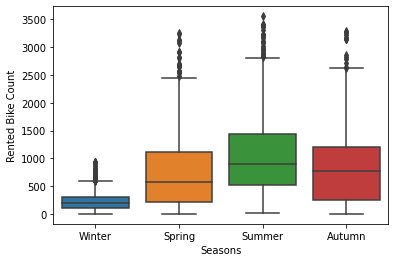

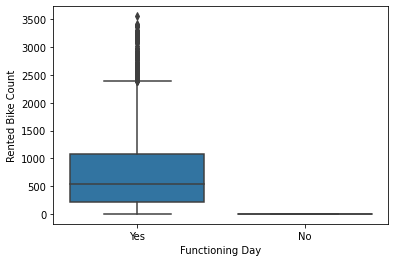

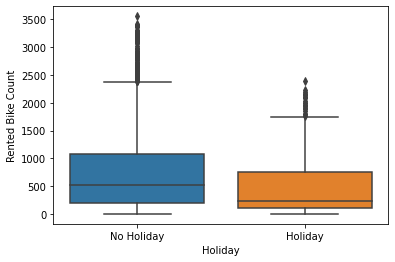

In [30]:
for col in ['Seasons','Functioning Day','Holiday']:
  sns.boxplot(x = data[col],y = data['Rented Bike Count'])
  plt.show()

### **Checking Outlayers**

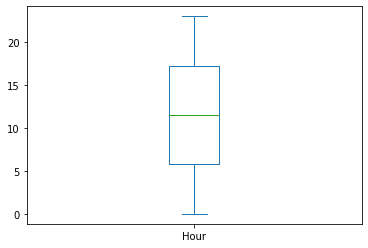

In [31]:
#Outlayers for Hour
data['Hour'].plot.box()

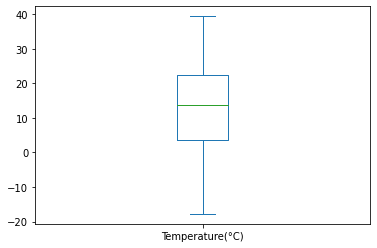

In [32]:
##Outlayers for temperature
data['Temperature(°C)'].plot.box()

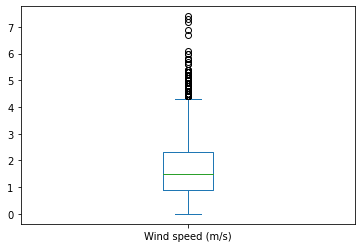

In [33]:
#Outlayers for Wind Speed
data['Wind speed (m/s)'].plot.box()

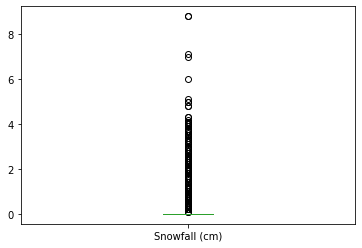

In [34]:
#Outlayers for Snowfall
data['Snowfall (cm)'].plot.box()

## **Correlation Heatmap of Features**

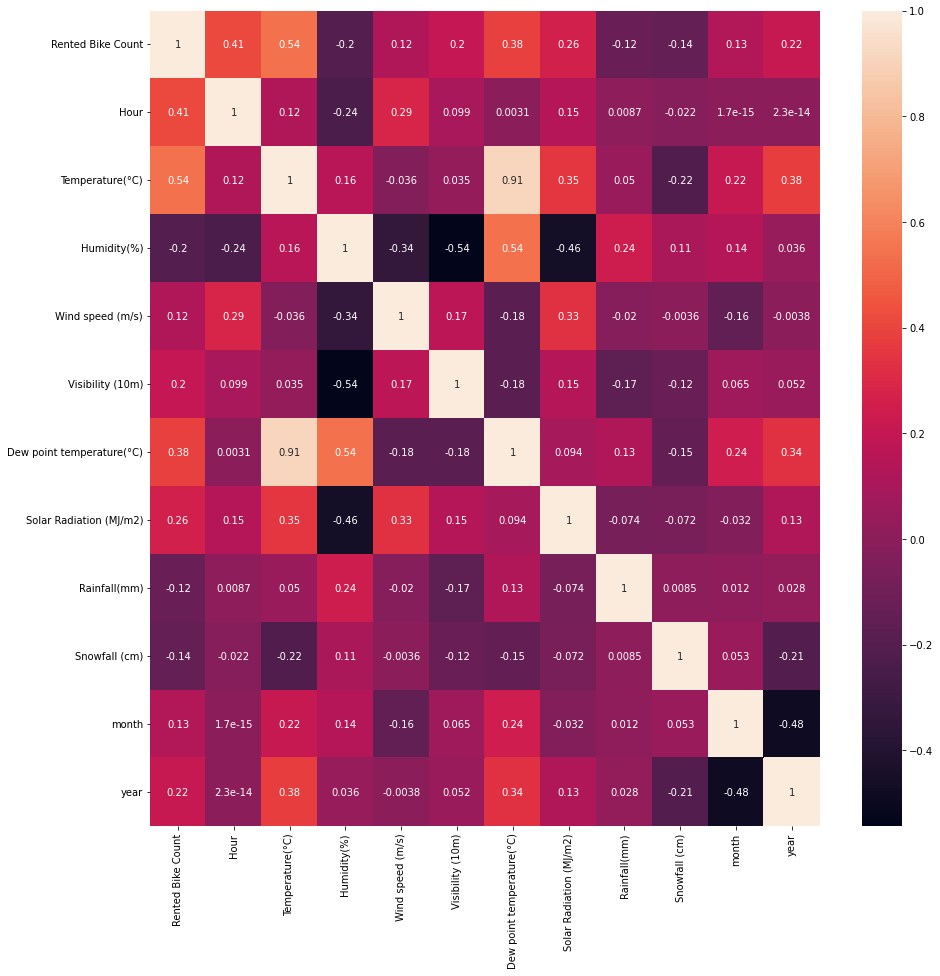

In [35]:
plt.figure(figsize = (15,15))
corr_df = data.corr()
sns.heatmap(corr_df, annot = True)

## **Modelling**

In [36]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [37]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [38]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,4.447602
1,Temperature(°C),3.614916
2,Humidity(%),23.479156
3,Wind speed (m/s),4.879251
4,Visibility (10m),10.457654
5,Solar Radiation (MJ/m2),2.751430
6,Rainfall(mm),1.089211
7,Snowfall (cm),1.134624
8,month,5.107309
9,year,54.779004


In [39]:
data.drop(columns=['Dew point temperature(°C)'],inplace=True)
data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [40]:
new_data=pd.get_dummies(data,drop_first=True,sparse=True)
new_data.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0,1,1,1


## **We saw that our dependent variable is right skewed, it needs to be normalized.**
 We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

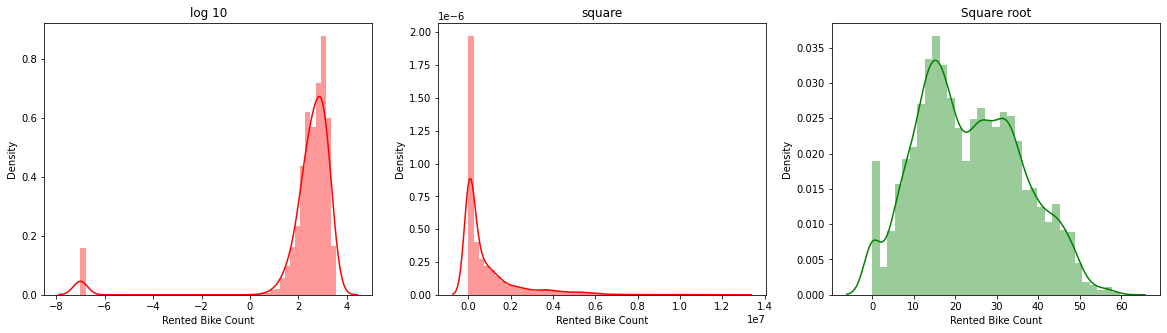

In [41]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_data['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_data['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_data['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

## **Geeting Feel of my X_train, X_test, y_train, y_test**

In [42]:
X = new_data.drop(columns='Rented Bike Count')
y = np.sqrt(new_data['Rented Bike Count'])


In [43]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
2223,15,16.0,14,2.2,1828,2.33,0.0,0.0,3,2018,...,0,0,0,0,0,1,0,0,1,1
798,6,-6.7,48,2.4,1991,0.00,0.0,0.0,1,2018,...,0,0,0,0,0,0,0,1,1,1
7752,0,11.3,71,1.2,1997,0.00,0.0,0.0,10,2018,...,0,0,0,0,0,0,0,0,1,1
734,14,3.0,28,3.8,1956,1.10,0.0,0.0,12,2017,...,0,0,0,0,1,0,0,1,0,1
2881,1,11.5,77,2.0,593,0.00,0.0,0.0,3,2018,...,0,0,0,0,0,1,0,0,1,1


In [44]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,...,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
6056,8,27.2,69,1.8,1999,0.70,0.0,0.0,8,2018,...,0,0,0,0,0,0,1,0,1,1
5556,12,32.6,51,2.1,800,3.21,0.0,0.0,7,2018,...,0,0,0,0,0,0,1,0,1,1
5990,14,34.0,50,1.2,1744,1.68,0.0,0.0,8,2018,...,0,0,0,0,0,0,1,0,1,1
7674,18,16.9,47,1.4,1637,0.11,0.0,0.0,10,2018,...,0,0,0,0,0,0,0,0,1,1
3319,7,6.4,51,1.0,1398,0.19,0.0,0.0,4,2018,...,0,0,0,0,0,1,0,0,1,1


In [45]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [46]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 379), (2190, 379), (6570,), (2190,))

# Creating a function for calculate score

## **Model-1 Linear Regression**

In [48]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 379)
(1752, 379)
(7008,)
(1752,)


In [50]:
reg = LinearRegression().fit(X_train,y_train)
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
regression.score(X_train,y_train)

0.7609633603097823

In [52]:
#predicting 
reg_pred = regression.predict(X_test)

In [53]:
 regression.coef_

array([ 4.36895262e-01,  8.55269490e-01, -9.95560846e-02,  2.90602958e-01,
        3.09743722e-03, -1.96415713e+00, -7.62675075e-01,  8.67557448e-01,
        3.47453956e+07,  5.91828321e+08, -4.31891458e+07,  2.05403491e+05,
       -4.29837461e+07, -6.92853830e+07,  3.61829368e+07,  1.43752297e+06,
       -3.33078691e+07,  1.25371177e+07, -2.22082711e+07, -5.69536622e+07,
        2.01185224e+08, -8.44375077e+06, -4.31891438e+07, -8.23834952e+06,
       -4.29837463e+07, -7.77291472e+07,  3.61829365e+07,  1.43752634e+06,
       -3.33078706e+07,  1.25371163e+07, -2.22082854e+07, -5.69536622e+07,
        2.01185222e+08, -8.44374829e+06, -4.31891452e+07, -8.23835302e+06,
       -4.29837469e+07, -7.77291402e+07,  3.61829336e+07,  1.43753852e+06,
       -3.33078690e+07,  1.25371091e+07, -1.37645163e+07, -5.69536753e+07,
        2.01185221e+08, -8.44374639e+06, -4.31891450e+07, -8.23835668e+06,
       -4.29837466e+07, -7.77291385e+07,  3.61829376e+07,  1.43753870e+06,
       -3.33078701e+07,  

In [54]:
regression.intercept_

-1194643240361.2554

In [55]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

## **Regression Evaluation Metrics**

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)
MAE = mean_absolute_error(y_test,y_pred)
print('MAE:', MAE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

MSE: 42.701860325986296
MAE: 4.989188065072764
RMSE: 6.534666045482837


In [57]:
r2_line_train = r2_score(y_train,y_pred_train)*100
r2_line_train

76.09633603097822

In [58]:
r2 = r2_score(y_test,y_pred)*100
print("R2:", r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

R2: 72.88534181247638
Adjusted R2 :  0.6539521393122896


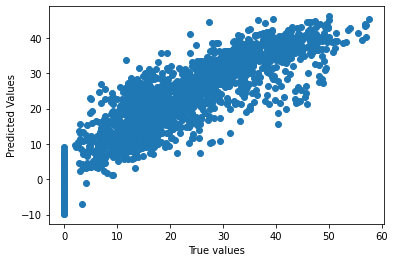

In [59]:
#Analysing true and Predicted Value
plt.scatter(y_test,y_pred)
plt.xlabel('True values'), plt.ylabel('Predicted Values')
plt.show()

## **Polynomial Regression**

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [62]:
poly_X_train[:5]

array([[ 1. , 15. ,  8.2, ...,  1. ,  1. ,  1. ],
       [ 1. , 18. , 28.4, ...,  1. ,  1. ,  1. ],
       [ 1. , 11. , 29.9, ...,  1. ,  1. ,  1. ],
       [ 1. , 10. , 14.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 20. , 12.2, ...,  1. ,  1. ,  1. ]])

In [63]:
poly_X_test[:5]

array([[ 1. ,  3. , 10.7, ...,  1. ,  1. ,  1. ],
       [ 1. ,  2. , 21.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 17. ,  3.6, ...,  1. ,  1. ,  1. ],
       [ 1. , 22. , -9.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 15. , 33.6, ...,  1. ,  1. ,  1. ]])